In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, classification_report , precision_score , fbeta_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [129]:
df = pd.read_csv("final_data.csv")

In [130]:
X = df.drop("Risk", axis=1)
y = df["Risk"]

In [131]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [133]:
k_values = []
for i in range(1, 31):
    k_values.append(i)
accuracy_list = []
recall_list = []
precision_list = []
f1_score_list = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    f1_score_list.append(fbeta_score(y_test , y_pred , beta=2))
    

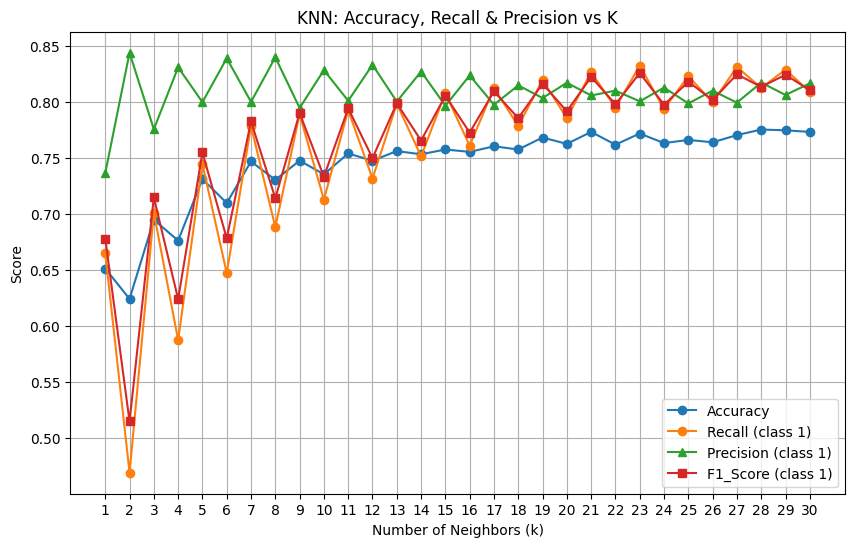

In [134]:
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracy_list, marker='o', label='Accuracy')
plt.plot(k_values, recall_list, marker='o', label='Recall (class 1)')
plt.plot(k_values, precision_list, marker='^', label='Precision (class 1)')
plt.plot(k_values, f1_score_list, marker='s', label='F1_Score (class 1)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('KNN: Accuracy, Recall & Precision vs K')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

In [135]:
knn = KNeighborsClassifier(n_neighbors=23) # Best k-value
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy: " , accuracy_score(y_test, y_pred))
print("Recall: " , recall_score(y_test, y_pred))   
print("precision: " , precision_score(y_test, y_pred))
print("F1_Score: " , fbeta_score(y_test , y_pred , beta=2))

Accuracy:  0.7717546362339515
Recall:  0.8323563892145369
precision:  0.8004509582863585
F1_Score:  0.8257734356827169


In [136]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)
## Changing the threshold
y_proba = knn.predict_proba(X_test)[:, 1] 

threshold = 0.4 
y_pred_tuned = (y_proba >= threshold).astype(int)
print("Accuracy: " , accuracy_score(y_test, y_pred_tuned))
print("Recall: " , recall_score(y_test, y_pred_tuned))   
print("precision: " , precision_score(y_test, y_pred_tuned))#
print("F1_Score: " , fbeta_score(y_test , y_pred_tuned , beta=2))

## Why do we choose beta=2?
## Why should we change out threshold , why not the default 0.5?

Accuracy:  0.753922967189729
Recall:  0.9167643610785463
precision:  0.740530303030303
F1_Score:  0.8751119068934646
